In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Task - 1: Import the "Retail_Sales_Data.csv" dataset.

In [3]:
df = pd.read_csv("Retail_Sales_Data.csv")

# Task - 2: Explore the dataset to understand its structure and content.

In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
13989,I497590,C170225,Male,43,Food & Beverage,3,15.69,Cash,15/03/2022,Metrocity
13990,I829083,C207142,Female,51,Food & Beverage,1,5.23,Credit Card,3/10/2021,Kanyon
13991,I100307,C887007,Female,58,Clothing,3,900.24,Credit Card,24/01/2022,Kanyon
13992,I187787,C175970,Male,38,Technology,1,1050.00,Cash,10/9/2022,Cevahir AVM
13993,I290248,C224986,Female,58,Toys,4,143.36,Cash,8/2/2022,Ka


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      13994 non-null  object 
 1   customer_id     13994 non-null  object 
 2   gender          13994 non-null  object 
 3   age             13994 non-null  int64  
 4   category        13994 non-null  object 
 5   quantity        13994 non-null  int64  
 6   price           13994 non-null  float64
 7   payment_method  13994 non-null  object 
 8   invoice_date    13994 non-null  object 
 9   shopping_mall   13994 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.1+ MB


In [7]:
df.describe()

,age,quantity,price
count,13994.000000,13994.000000,13994.000000
mean,43.523439,2.997142,688.194503
std,14.933615,1.418953,951.703002
min,18.000000,1.000000,5.230000
25%,31.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [10]:
# Check for missing values
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


# Task - 3: Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.

In [11]:
# Step 1: Identify relevant columns
relevant_columns = ["shopping_mall", "price", "category"]
data = df[relevant_columns]
data

,shopping_mall,price,category
0,Kanyon,1500.40,Clothing
1,Forum Istanbul,1800.51,Shoes
2,Metrocity,300.08,Clothing
3,Metropol AVM,3000.85,Shoes
4,Kanyon,60.60,Books
...,...,...,...
13989,Metrocity,15.69,Food & Beverage
13990,Kanyon,5.23,Food & Beverage
13991,Kanyon,900.24,Clothing
13992,Cevahir AVM,1050.00,Technology


# Task - 4: Group the sales data by region and calculate the total sales amount for each region

In [12]:
# Step 2: Group by 'shopping_mall' and calculate the total sales amount
sales_by_region = data.groupby("shopping_mall")["price"].sum()

# Display the result
print(sales_by_region)

shopping_mall
Cevahir AVM           475255.26
Emaar Square Mall     488826.05
Forum Istanbul        488981.83
Istinye Park          909240.92
Ka                       143.36
Kanyon               1903487.11
Mall of Istanbul     2021040.88
Metrocity            1391662.92
Metropol AVM          932199.12
Viaport Outlet        497405.70
Zorlu Center          522350.72
Name: price, dtype: float64


# Task -5: Create bar plots or pie charts to visualize the sales distribution by region.

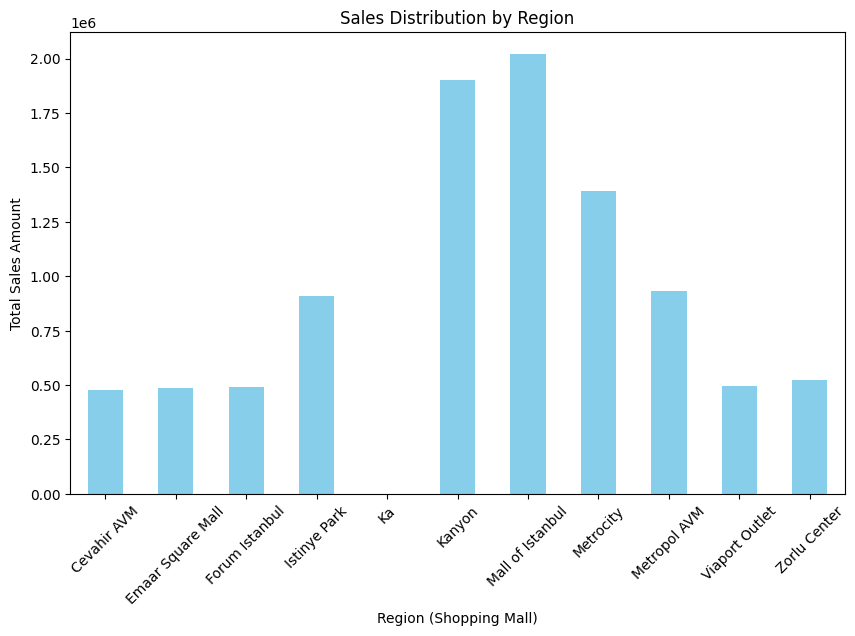

In [13]:
# Plot a bar chart of sales distribution by region
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title("Sales Distribution by Region")
plt.xlabel("Region (Shopping Mall)")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

# Task - 6: Identify the top-performing regions based on the highest sales amount.

In [15]:
# Sort the sales data by total sales amount in descending order to identify top-performing regions
top_performing_regions = sales_by_region.sort_values(ascending=False)

# Display the top-performing regions
print(top_performing_regions)

shopping_mall
Mall of Istanbul     2021040.88
Kanyon               1903487.11
Metrocity            1391662.92
Metropol AVM          932199.12
Istinye Park          909240.92
Zorlu Center          522350.72
Viaport Outlet        497405.70
Forum Istanbul        488981.83
Emaar Square Mall     488826.05
Cevahir AVM           475255.26
Ka                       143.36
Name: price, dtype: float64


# Task - 7: Group the sales data by region and product category to calculate the total sales amount for each combination

In [16]:
# Group the sales data by region (shopping_mall) and product category, and calculate the total sales amount
sales_by_region_category = data.groupby(["shopping_mall", "category"])["price"].sum()

# Display the result
print(sales_by_region_category)

shopping_mall  category       
Cevahir AVM    Books                1499.85
               Clothing           179147.76
               Cosmetics           13621.10
               Food & Beverage      1673.60
               Shoes              124835.36
                                    ...    
Zorlu Center   Food & Beverage      1616.07
               Shoes              144040.80
               Souvenir             1302.03
               Technology         137550.00
               Toys                 8529.92
Name: price, Length: 81, dtype: float64


# Task - 8 : Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

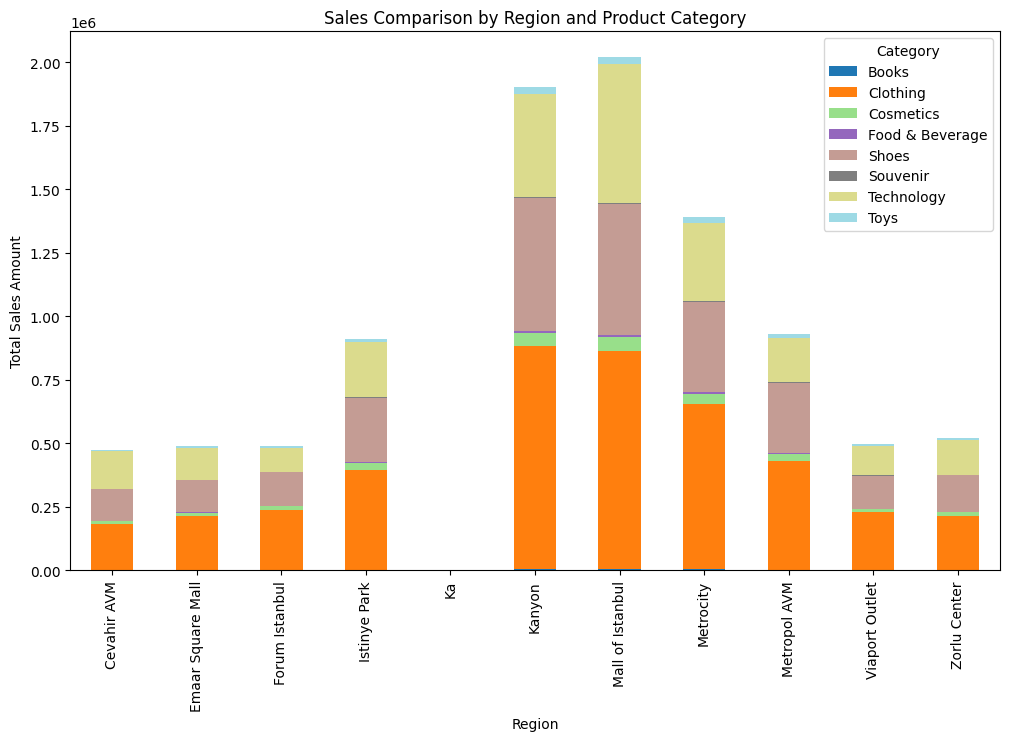

In [17]:
#Create a stacked bar plot to compare sales across regions and categories
sales_by_region_category.unstack().plot(kind="bar", stacked=True, figsize=(12, 7), colormap='tab20')
plt.title("Sales Comparison by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title="Category")
plt.show()